# **Lecture: K Nearest Neighbor**

---
Pipeline:
- Read in data.
- Break into features and targets.
- Break into training and testing.
- Measure distance from each testing point to all training points.
    - Do this for every `k`.
    - Assess the score for each.
    - Graph them all. 
- Use that `k` for production code. <-- To do (part of next week)
---

In the below notebook you will find the structure of our production KNN code. There are some comments for each of the definitions, but the included inline comments are questions. These questions are there to help us puzzle through the code and connect it to the conversation we had in class about the algorithm.

Pick a question and copy it and the answer (or thoughts on the question) into discord.

In [3]:
import numpy as np # For math.
import pandas as pd # For data.
from tqdm import tqdm # For timing loops.
# Quality of life Python tools below
import matplotlib.pyplot as plt # For plotting.
from scipy import stats # For mode.

## Read in data and process Data.

In [4]:
def READ_IN_DATA(PATH, f, P):
    
    """
    Reads in the csv data at the PATH, the number of features to extract and the percentage of data for training. 
    
    This data is shuffled and splits it into training and testing. 
    The training and the testing data are then split into features and targets, and the testing 
    data is left with the features and targets together. Data needs to be features not labels
    
    This returns the raw data, the training features and targets the testing features and targets and the training size.
    """
    RAW_DATA = pd.read_csv(PATH).sample(frac=1) # What does the pandas command sample(frac=1) do? SHUFFLES DATA 
    #"By shuffling your data, you ensure that each data point creates an "independent" change on the model, 
    # without being biased by the same points before them
    RAW_DATA["Num_Cat"] = pd.factorize(RAW_DATA.iloc[:, -1])[0] # What does the pandas command factorize do? 
    # Method helps to get the numeric representation of an array by identifying distinct values
    #Takes string data (words) and turns them into numbers
    
    RAW_DATA = np.array(RAW_DATA)
    # Allow the user to break the data AKA set the size for testing 
    Count = int(np.floor(np.shape(RAW_DATA)[0] * P)) # What is going on here? 
    #The floor() function gives us the rounded value of each element. Floor value is always less than equal to the given value
    # What percentage of the data should be training data
    training = RAW_DATA[: Count, 1:] # Why is there a 1 here? (Hint: Look at the data without this definition) Starts on the second column
    # because we are skipping over a column of data that is a labels
    testing = RAW_DATA[Count : , 1:] 
    # testing and training is breaking homework from tests (give somedata so machine learns answer then feed in unanalyzed data to see if the computer can identify)
    X_training = training[:, : f] # [:, :f] goes all the way up to, but not including f, 
    Y_training = training[:, -1]

    X_testing = testing[:, : f]
    Y_testing = testing[:, -1] # -1 allows us to count backwards, one column back from last column
    
    return [RAW_DATA, X_training, Y_training, X_testing, Y_testing, Count]

## Measure distance from each testing point to all training points.

In [5]:
def distance(x,y):
    """
    Takes two numpy arrays. 
    
    Finds the distance between each of the points in the two arrays. 
    
    Returns (n,1) array with all the distances.
    
    """
    return np.sum(np.power((x - y) , 2) , axis = 1) # What does the axis = 1 do? Sums the rows of the array

In [4]:
def KNN(x, DATA, k, N):
    """
    Takes a tuple, the data we will compare, the value for k and the amount of training data. 
    
    Returns the class element for a particular data or array of data.
    """
    
    point = np.array([x] * N)
    idx = np.argsort(distance(point, DATA[0]))[ : k] # What does the numpy command argsort do? Argsort() argument sorting  function is used 
    # to perform an indirect sort along the given axis using the algorithm specified by the kind keyword.
    #Here. sorts data from smallest to largest and returns the index; won't list distances, but will list distances in the array (the location in the array = neighborhood)
    # Will return "hey, here is list of neighbors and we can use that determine the nearest neighbors target values and use mode to determine the most occuring value"
    return stats.mode(DATA[1][idx])[0] # Why are we looking for the mode here? Identify central tendancy or tendancies

100%|██████████| 19/19 [00:37<00:00,  1.99s/it]


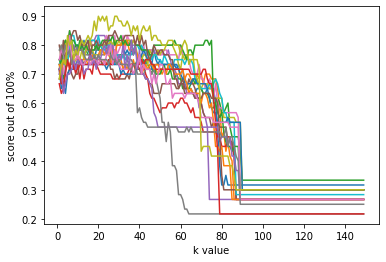

In [9]:
Gen_Overview = []
l = 0

for l in tqdm(range(1,20)): #tqdm creates progress bars?
    
    # Why are we reading the data in the above for loop? What would change if we moved this line above the loop?
    R, X_train, Y_train, X_test, Y_test, Train_Size = READ_IN_DATA("Iris.csv", 2, .60)

    k_overview = []
    
    # What does the below loop do?
    for k in range(1,150):
        
        s = 0
        j = 0
        
        Test_Data = [X_test, Y_test]

        for F in Test_Data[0]:

            C = KNN(F, [X_train, Y_train], k, Train_Size)

            # What does this if statement do?
            if C == Test_Data[1][j]:
                s += 1

            j += 1

        k_overview.append([k, s / j]) # What is s / j? What is j?

    k_overview = np.array(k_overview)

    plt.plot(k_overview[:,0], k_overview[:,1]) 
    plt.xlabel("k value")
    plt.ylabel("score out of 100%")
     
    l += 1

In [12]:
# How can we best extract the "best" k from the above info? (We will need more code and an edit to the above cell to do this.)

In [ ]:
# Start thinking production. How could we use this? What issues do you see that we many need to address?